データを見る

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

与えられた `country_data.csv`から支援するべき国を判断するタスク

データを扱う上でとにもかくにもindexが欲しい. まず扱いやすそうな国名がユニークかどうか判定する.

In [195]:
df = pd.read_csv("../data/econ/clustering/country_data.csv")
df.count(),df.duplicated()

(country       167
 child_mort    167
 exports       167
 health        167
 imports       167
 income        167
 inflation     167
 life_expec    167
 total_fer     167
 gdpp          167
 dtype: int64,
 0      False
 1      False
 2      False
 3      False
 4      False
        ...  
 162    False
 163    False
 164    False
 165    False
 166    False
 Length: 167, dtype: bool)

ヨサソウ

In [178]:
indexed_df = df.set_index("country",drop=False)

In [181]:
indexed_df.sample(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
country,,,,,,,,,,
Jamaica,Jamaica,18.1,31.3,4.81,49.6,8000,9.81,74.7,2.17,4680
Mali,Mali,137.0,22.8,4.98,35.1,1870,4.37,59.5,6.55,708
Mongolia,Mongolia,26.1,46.7,5.44,56.7,7710,39.20,66.2,2.64,2650
Malta,Malta,6.8,153.0,8.65,154.0,28300,3.83,80.3,1.36,21100
"Congo, Dem. Rep.","Congo, Dem. Rep.",116.0,41.1,7.91,49.6,609,20.80,57.5,6.54,334
Nigeria,Nigeria,130.0,25.3,5.07,17.4,5150,104.00,60.5,5.84,2330
Canada,Canada,5.6,29.1,11.30,31.0,40700,2.87,81.3,1.63,47400
Tunisia,Tunisia,17.4,50.5,6.21,55.3,10400,3.82,76.9,2.14,4140
Serbia,Serbia,7.6,32.9,10.40,47.9,12700,5.88,74.7,1.40,5410


In [71]:
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


データの単位や属性がイマイチはっきりしないので定義を見てみよう.

In [83]:
pd.set_option('display.max_colwidth', None)


pd.read_csv("../data/econ/clustering/data_dictionary.csv")

,Column Name,Description
0,country,Name of the country
1,child_mort,Death of children under 5 years of age per 1000 live births
2,exports,Exports of goods and services. Given as %age of the Total GDP
3,health,Total health spending as %age of Total GDP
4,imports,Imports of goods and services. Given as %age of the Total GDP
5,Income,Net income per person
6,Inflation,The measurement of the annual growth rate of the Total GDP
7,life_expec,The average number of years a new born child would live if the current mortality patterns are to remain the same
8,total_fer,The number of children that would be born to each woman if the current age-fertility rates remain the same.
9,gdpp,The GDP per capita. Calculated as the Total GDP divided by the total population.


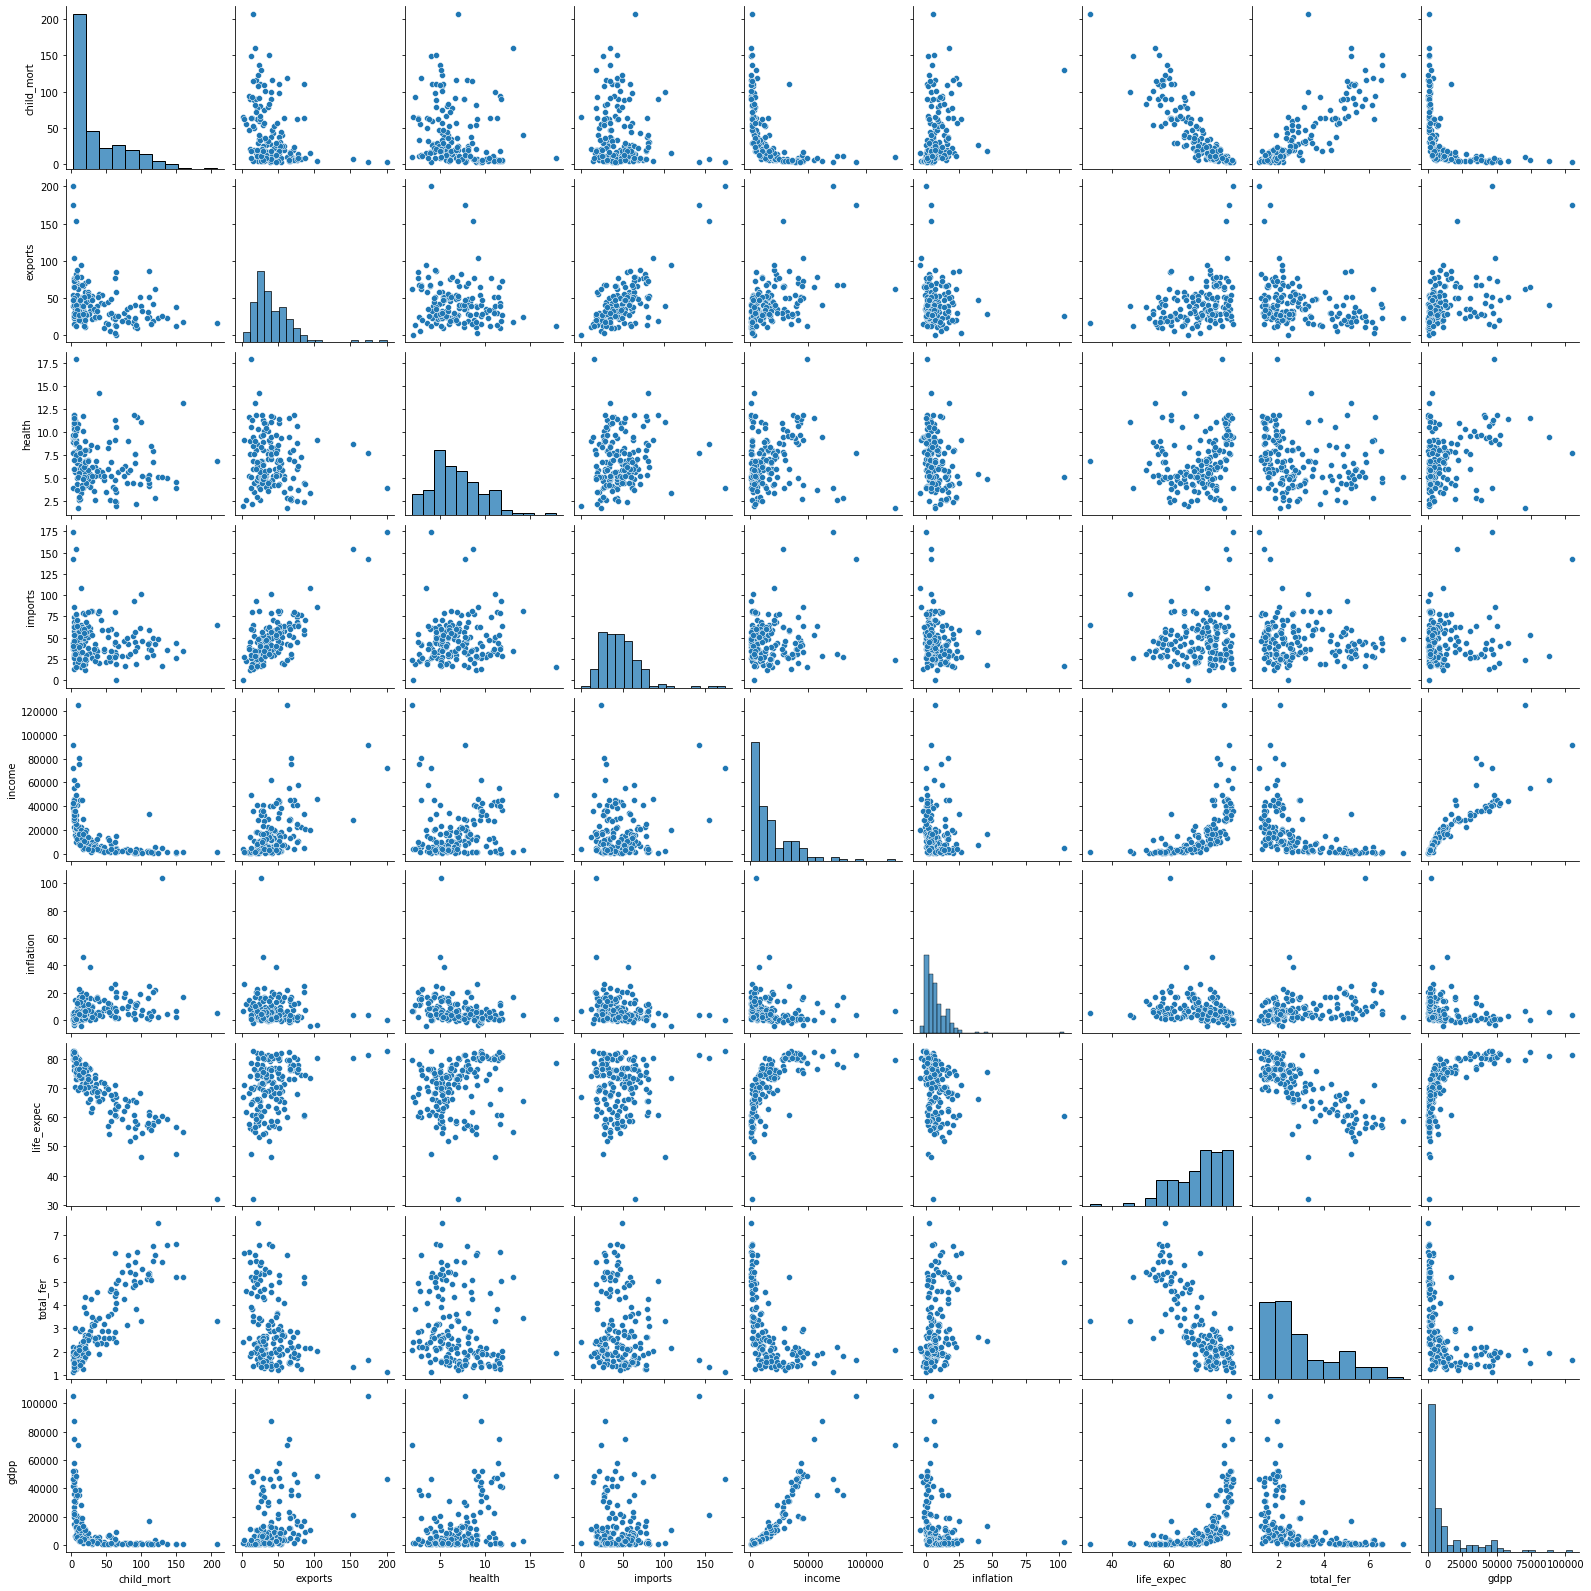

In [11]:
sns.pairplot(df)
plt.show()


ふむ...なんもわからん... いや、一部は相関が強いが他はそんなに強くない、という点とパレートの法則っぽい分布がいくつかのカテゴリで見つかる

/home/yoichiro/develop/analysis/.venv/lib/python3.9/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


child_mort        AxesSubplot(0.125,0.71587;0.168478x0.16413)
exports        AxesSubplot(0.327174,0.71587;0.168478x0.16413)
health         AxesSubplot(0.529348,0.71587;0.168478x0.16413)
imports        AxesSubplot(0.731522,0.71587;0.168478x0.16413)
income           AxesSubplot(0.125,0.518913;0.168478x0.16413)
inflation     AxesSubplot(0.327174,0.518913;0.168478x0.16413)
life_expec    AxesSubplot(0.529348,0.518913;0.168478x0.16413)
total_fer     AxesSubplot(0.731522,0.518913;0.168478x0.16413)
gdpp             AxesSubplot(0.125,0.321957;0.168478x0.16413)
dtype: object

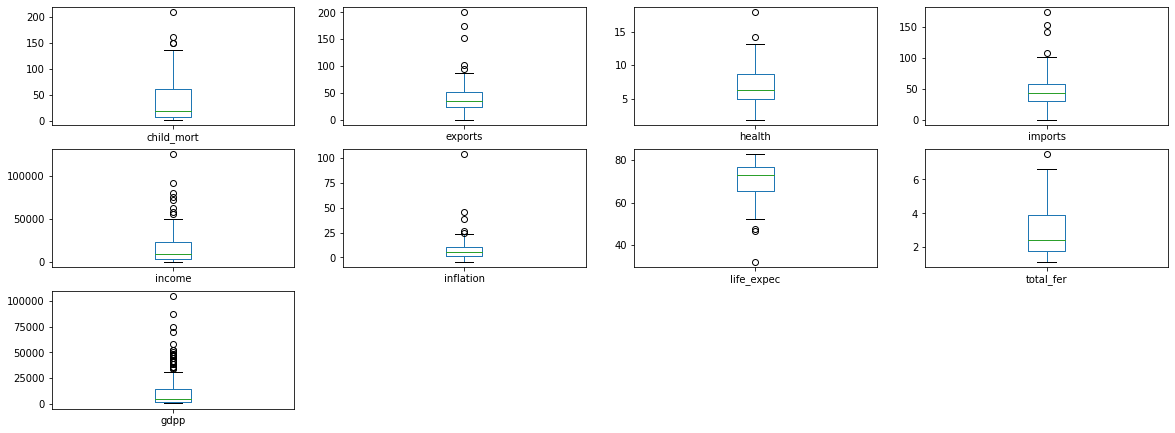

In [97]:
df.plot(kind="box",subplots=True,layout=(4,4),sharex=False,figsize=(20,10))


外れ値が多い. 今回は支援すべき国を見つけたいので外れ値の中でも財政・健康の悪条件の外れ値は残したい. 一方、良条件の外れ値はそれほど重要ではない.

/home/yoichiro/develop/analysis/.venv/lib/python3.9/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


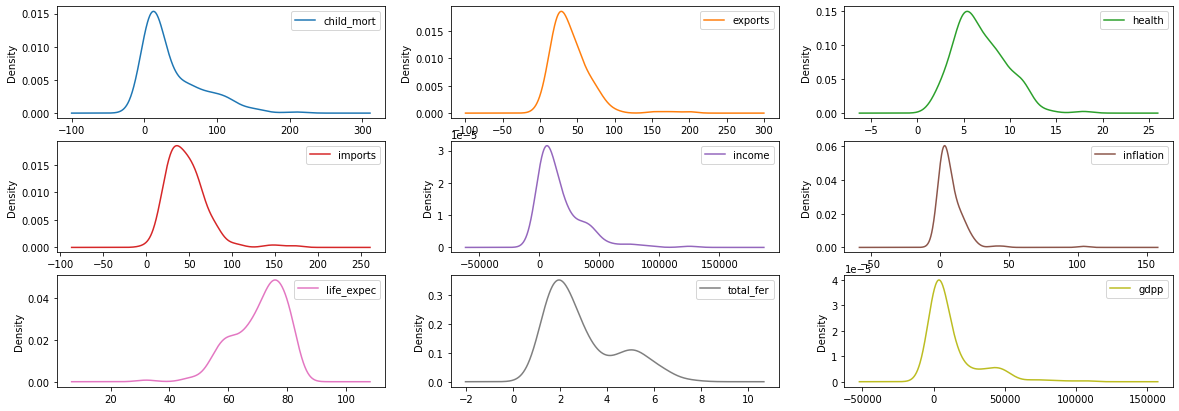

In [96]:
df.plot(kind='density',subplots=True,layout=(3,3), sharex=False,figsize = (20,7))
plt.show()

total fer, gdppが双峰ぽい. 先進国とそれ以外で出生率,一人当たりgpdはだいぶ違うからか?

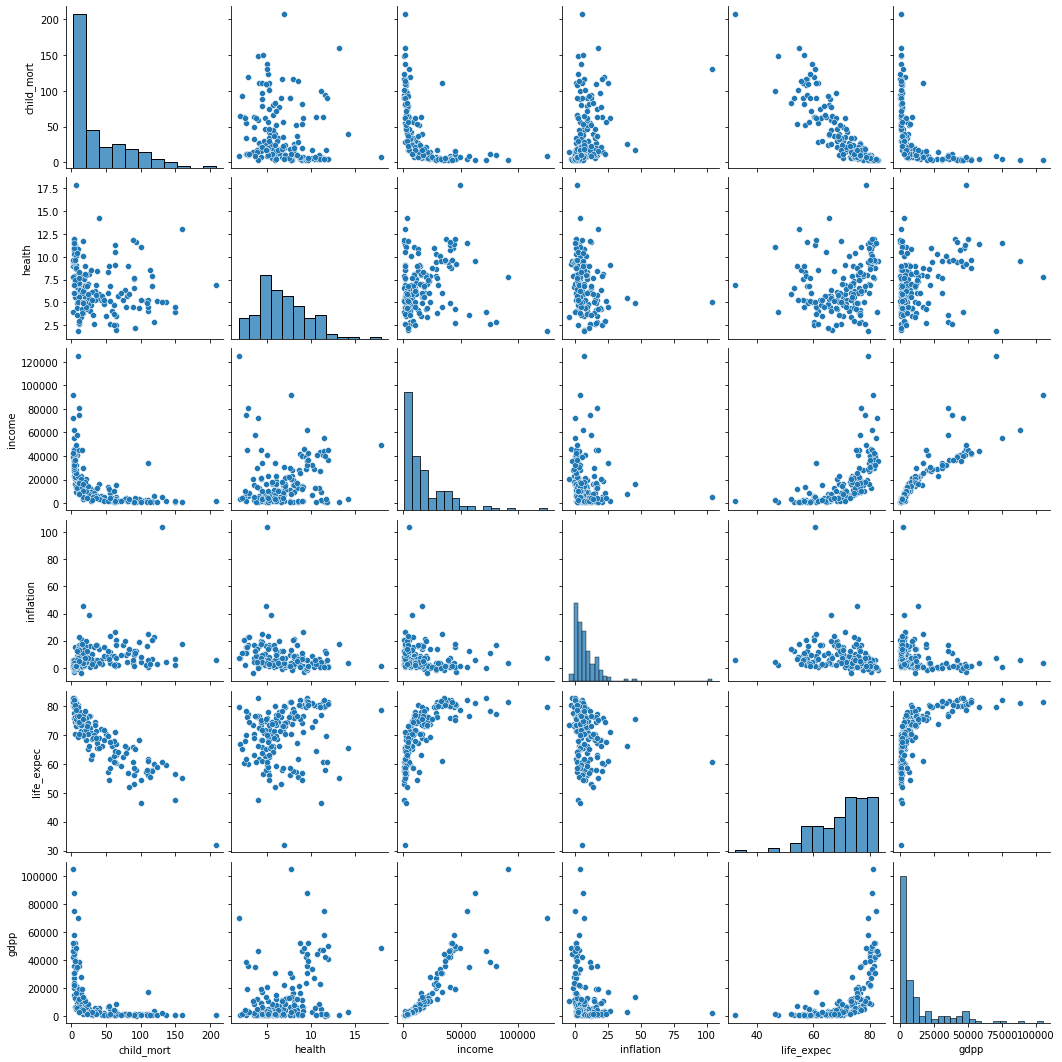

In [302]:
sns.pairplot(df,vars=["child_mort","health","income","inflation","life_expec","gdpp"])

健康への投資が健康系のパラメタと相関してないのが不思議. うー－ん、パーセントだからそもそも健康系のパラメータが悪条件の国は財政的にも厳しい、ゆえに投資の絶対量が少ない,とか？
GDPから絶対量を取り出してみたら別の関係性が出てくるかもしれない.(特にパーセントにすると分母分子の情報が失われてしまうわけだし...)

gdppみればええやんけ😇
gdppとhealthは強い相関がある


In [293]:
df = pd.read_csv("../data/econ/clustering/country_data_with_population.csv",index_col="country_code")

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,indicator_name,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
country_code,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
JPN,Japan,3.2,15.0,9.49,13.6,35800,-1.9,82.8,1.39,44500,"Population, total",92500572.0,94943000.0,95832000.0,96812000.0,97826000.0,98883000.0,99790000.0,100725000.0,101061000.0,103172000.0,104345000.0,105697000.0,107188000.0,108079000.0,110162000.0,111940000.0,112771000.0,113863000.0,114898000.0,115870000.0,116782000.0,117648000.0,118449000.0,119259000.0,120018000.0,120754000.0,121492000.0,122091000.0,122613000.0,123116000.0,123537000.0,123921000.0,124229000.0,124536000.0,124961000.0,125439000.0,125757000.0,126057000.0,126400000.0,126631000.0,126843000.0,127149000.0,127445000.0,127718000.0,127761000.0,127773000.0,127854000.0,128001000.0,128063000.0,128047000.0,128070000.0,127833000.0,127629000.0,127445000.0,127276000.0,127141000.0,126994511.0,126785797.0,126529100.0,126264931.0


In [297]:
df["abs_health_expenditure"]= df["gdpp"]*df["health"]

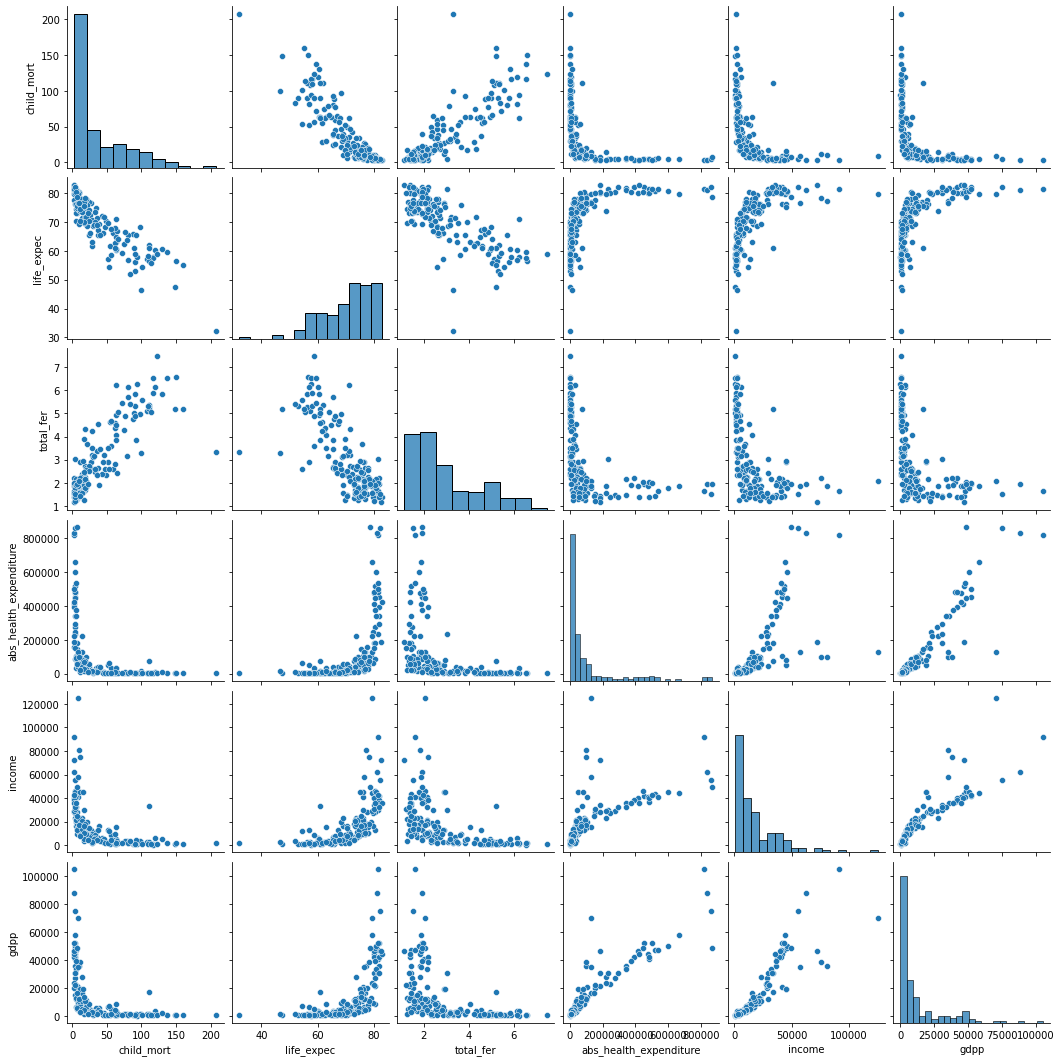

In [303]:
sns.pairplot(df,vars=["child_mort","life_expec","total_fer","abs_health_expenditure","income","gdpp"])

income と abs_health_expenditure の関係が右側で二股に分かれるのは大きな政府/小さな政府の違い? 福祉国家ラベルと小さな国家ラベルをはれば層別できそう. 所得の再分配からみればいいかな. ジニ係数とってくるか


In [306]:
import plotly
import plotly.graph_objs as go

In [433]:
gini=pd.read_csv("../data/econ/clustering/gini_coefficients.csv",skiprows=3).rename(columns=lambda s: s.replace(" ","_").lower()).set_index("country_code",drop=True).drop(columns=["indicator_name","unnamed:_65"])



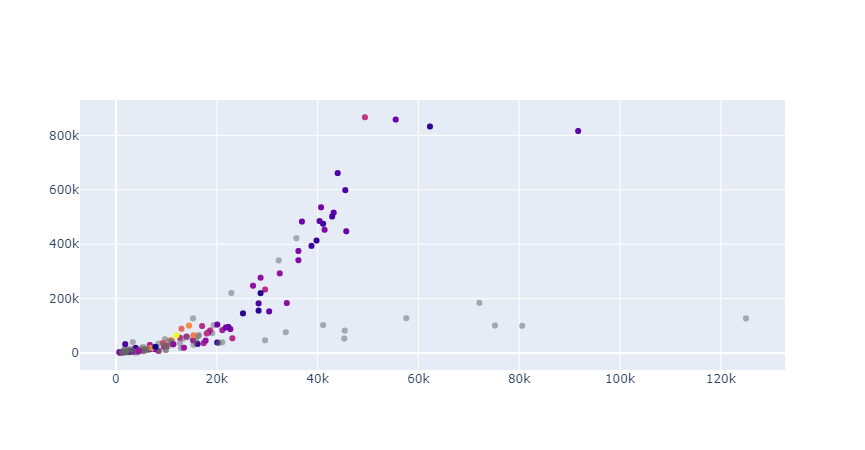

In [428]:
import math
go.Scatter()

labels=df[["country"]].join(gini[["2014"]]).apply(lambda s: f"{s['country']}. Gini: {s['2014']/100 :02f}",axis=1)

fig = go.Figure(data=go.Scatter(
                x=df['income'],
                y=df['abs_health_expenditure'],
                text =labels,
    marker=dict(color=list(map(lambda v:  "rgba(100,100,100,0.5)" if math.isnan(v) else v ,df[["country"]].join(gini[["2014"]])["2014"]))),
                mode='markers'
))
fig.show()

右下の国々は石油資源国ぽい
ジニ係数がないのは偶然？

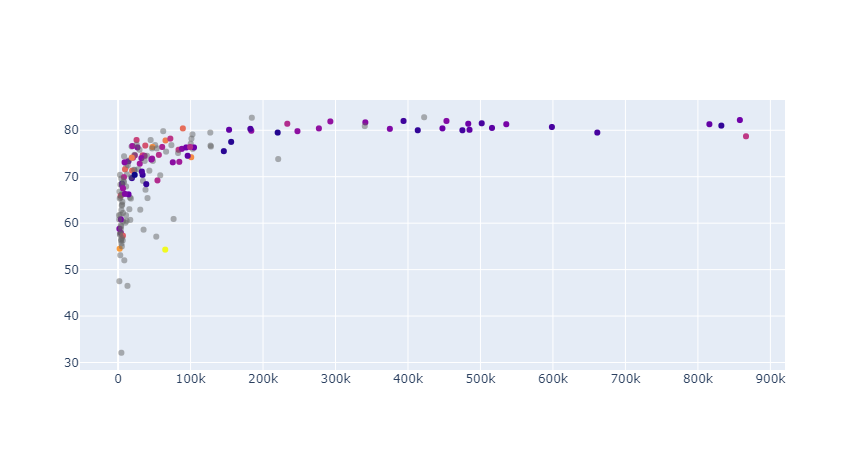

In [432]:
fig = go.Figure(data=go.Scatter(
                    x=df['abs_health_expenditure'],
                y=df['life_expec'],
                text =labels,
    marker=dict(color=list(map(lambda v:  "rgba(100,100,100,0.5)" if math.isnan(v) else v ,df[["country"]].join(gini[["2014"]])["2014"]))),
                mode='markers'
))
fig.show()

country_code
AFG     NaN
ALB    34.6
DZA     NaN
AGO     NaN
ATG     NaN
       ... 
VUT     NaN
VEN     NaN
VNM    34.8
YEM    36.7
ZMB     NaN
Name: 2014, Length: 167, dtype: float64